In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv('loan_data.csv')

In [2]:
#EDA (Exploratory Data Analysis)
#Show head, info, and describe
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,debt_consolidation,0.1836,630.39,11.877569,29.96,667,13979.041670,212629,87.4,3,0,0,1
1,0,credit_card,0.1576,192.72,10.691945,29.95,692,2790.000000,26313,58.5,9,0,2,0
2,0,all_other,0.1791,144.43,10.868568,29.90,662,3119.958333,15473,65.3,0,1,0,0
3,0,educational,0.1759,107.85,10.759072,29.74,662,4500.000000,2663,20.3,0,1,0,0
4,0,debt_consolidation,0.1797,361.38,11.289782,29.72,672,8489.958333,25879,77.2,2,3,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<AxesSubplot:>

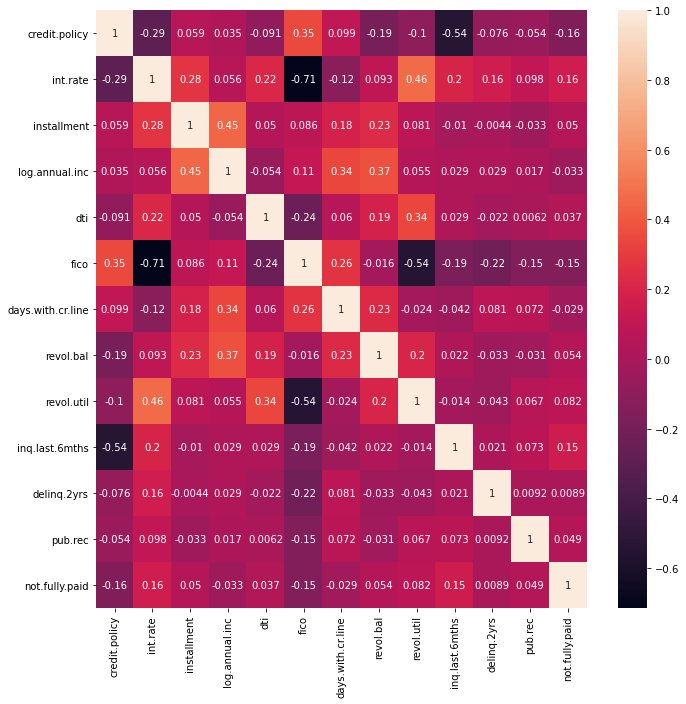

In [5]:
#heatmap of correlations
fig, ax = plt.subplots(figsize=(11,11))   
sns.heatmap(df.corr(),annot=True, ax=ax)

In [6]:
#Train Test Split
X = pd.get_dummies(df.drop("credit.policy",axis=1),drop_first=True)
y = df["credit.policy"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(0.3),random_state = 101)

In [8]:
#Calculate error for different number of decision trees
test_error = []
for n in range(1, 60):
    model = RandomForestClassifier(n_estimators=n, max_features = "auto")
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

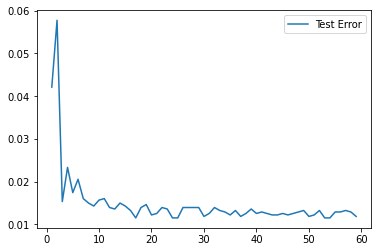

In [9]:
#Plot test error vs the number of decision trees to find the best number of estimators in the forest
plt.plot(range(1,60), test_error, label="Test Error")
plt.legend()

In [10]:
#From the previous model, use 10 estimators and fit to the testing data
model = RandomForestClassifier(n_estimators=10, max_features = "auto", random_state=101)
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [11]:
#Show confusion matrix results
confusion_matrix(y_test, base_preds)

array([[ 523,   31],
       [   8, 2312]], dtype=int64)

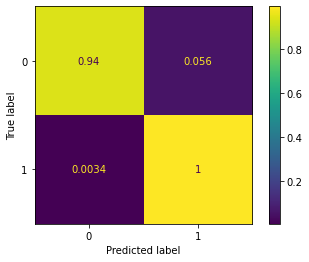

In [12]:
#Plot normalized confusion matrix
plot_confusion_matrix(model, X_test, y_test,normalize = 'true')

In [13]:
#Show weighted feature importances
pd.DataFrame(index=X.columns,data = model.feature_importances_, columns=["Feature Importance"])

,Feature Importance
int.rate,0.040583
installment,0.015747
log.annual.inc,0.021769
dti,0.056902
fico,0.218258
days.with.cr.line,0.110399
revol.bal,0.067013
revol.util,0.025227
inq.last.6mths,0.424905
delinq.2yrs,0.004449


In [14]:
#Show classifcation report
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       554
           1       0.99      1.00      0.99      2320

    accuracy                           0.99      2874
   macro avg       0.99      0.97      0.98      2874
weighted avg       0.99      0.99      0.99      2874

